# CUSTOMER CHURN ANALYSIS 

A rotatividade (churn) de clientes ocorre quando os clientes ou assinantes param de fazer negócios com uma empresa ou serviço. Também é conhecido como perda de clientes ou taxa de cancelamento.

Esse Projeto visa prever a rotatividade (churn) de clientes usando um conjunto de dados de telecomunicações, com tema e dataset proposto pela DSA(DataScience Academy)

In [191]:
import math
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import Normalizer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
import warnings
warnings.filterwarnings("ignore")

In [192]:
# Carregando os Datasets, os dataset vieram separados em treino e teste, para facilitar o processo
#de análise e manipulação de dados, iremos unir os dois
df1 = pd.read_csv('projeto4_telecom_treino.csv')
df2 = pd.read_csv('projeto4_telecom_teste.csv')
df = pd.concat([df1,df2]);df.head()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [193]:
# verificando valores ausentes
df.isna().any()

Unnamed: 0                       False
state                            False
account_length                   False
area_code                        False
international_plan               False
voice_mail_plan                  False
number_vmail_messages            False
total_day_minutes                False
total_day_calls                  False
total_day_charge                 False
total_eve_minutes                False
total_eve_calls                  False
total_eve_charge                 False
total_night_minutes              False
total_night_calls                False
total_night_charge               False
total_intl_minutes               False
total_intl_calls                 False
total_intl_charge                False
number_customer_service_calls    False
churn                            False
dtype: bool

In [194]:
# Limpando e ajustando o dataset
df = df.drop('Unnamed: 0', axis = 1)

def area(x):
    l = x['area_code'].split(sep='_')
    return l[2]

df['area_code'] = df.apply(area, axis=1)

df = df.reset_index() 
df = df.drop('index', axis = 1); df

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,50,408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no
4996,WV,152,415,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3,yes
4997,DC,61,415,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1,no
4998,DC,109,510,no,no,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0,no


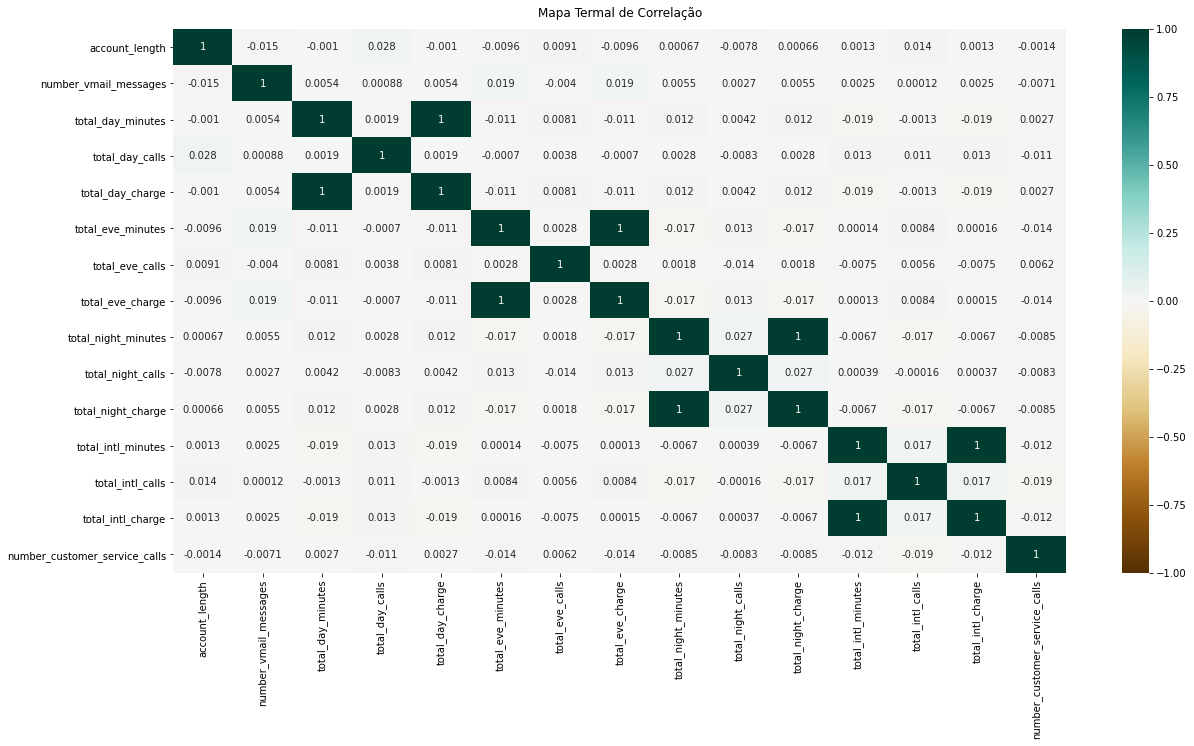

In [195]:
# Realizando um corrplot para avaliar a correlação entre as variáveis
%matplotlib inline
df_corr = df.corr()

plt.figure(figsize = (20,10))
corplot = sns.heatmap(df_corr, vmin = -1, vmax = 1, annot = True, cmap='BrBG')
corplot.set_title('Mapa Termal de Correlação', fontdict={'fontsize':12}, pad=12);

In [196]:
# Como algumas variáveis estão correlacionadas e o objetivo é criar um modelo o mais genérico possível,
#as variáveis com correlação 1 ou muito próximas disso serão removidas a fim de evitar multicolinearidade.

df = df.drop(['total_day_charge',
              'total_eve_charge',
              'total_night_charge',
              'total_intl_charge',
              'number_vmail_messages'],axis = 1)

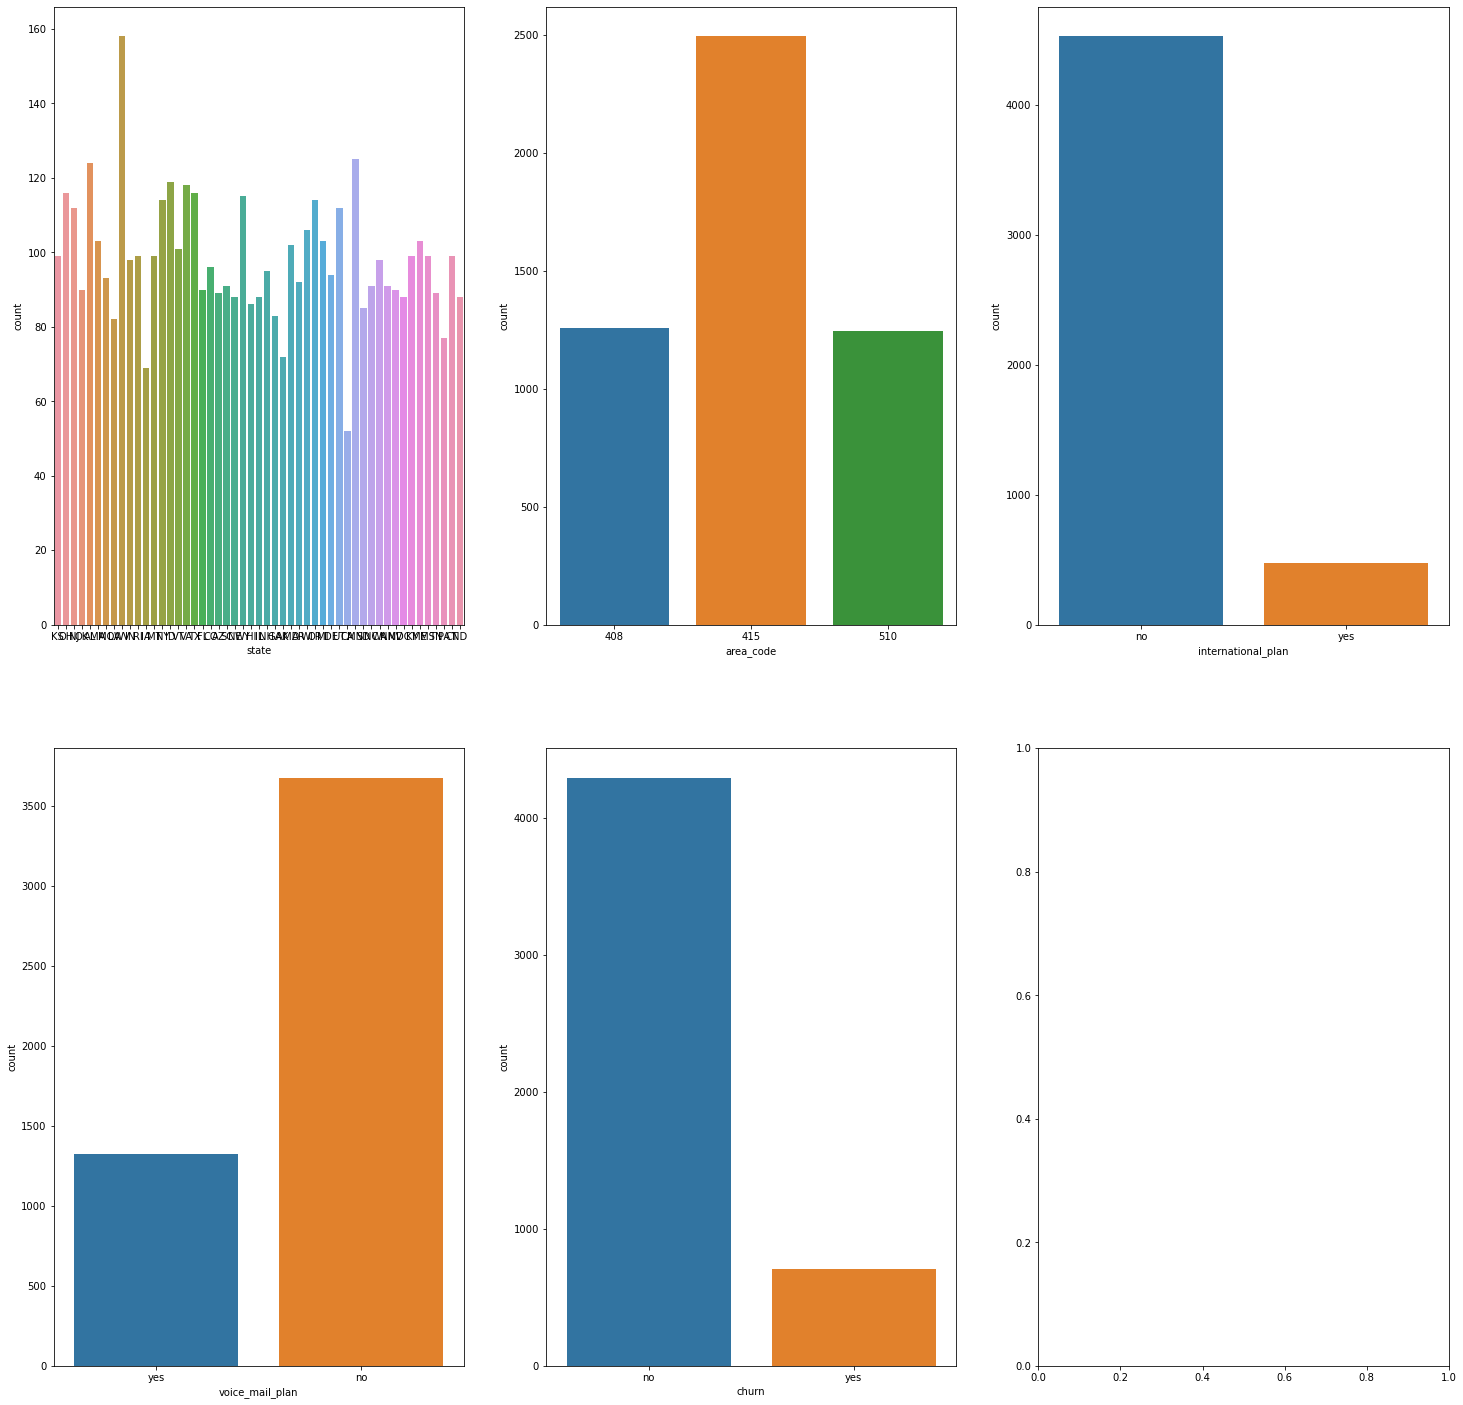

In [197]:
%matplotlib inline
# Avaliando as variáveis categóricas
catcols = ['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']

def plot_multiple_countplots(df, cols):
    num_plots = len(cols)
    num_cols = math.ceil(np.sqrt(num_plots))
    num_rows = math.ceil(num_plots/num_cols)
        
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(25,25))
    
    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols
        
        if num_rows == 1:
            if num_cols == 1:
                sns.countplot(x=df[col], ax=axs)
            else:
                sns.countplot(x=df[col], ax=axs[j])
        else:
            sns.countplot(x=df[col], ax=axs[i, j])
            
            
plot_multiple_countplots(df, catcols)

Todas as variáveis categóricas parecem ter um distribuição razoavelmente ampla, portanto, todas serão mantidas para análise posterior

In [198]:
# Mudando o datatype das variáveis categóricas
for i in catcols:
    df[i] = df[i].astype('category')
    df[i] = df[i].cat.codes    

In [199]:
# Feature Selection
array = df.values 

# Separando o array em componentes de input e output
X = array[:,0:14]
Y = array[:,14]

# Criação do Modelo - Feature Selection
modelo = ExtraTreesClassifier()
modelo.fit(X, Y)

# Print dos Resultados
res = [[round(modelo.feature_importances_[i],4),df.columns[i]] for i in range(len(df.columns)-1)]
res.sort(); res

[[0.0257, 'voice_mail_plan'],
 [0.0302, 'area_code'],
 [0.0529, 'state'],
 [0.0535, 'total_eve_calls'],
 [0.0539, 'total_night_calls'],
 [0.054, 'account_length'],
 [0.0549, 'total_day_calls'],
 [0.0611, 'total_night_minutes'],
 [0.0699, 'total_intl_minutes'],
 [0.0713, 'total_intl_calls'],
 [0.0722, 'international_plan'],
 [0.0804, 'total_eve_minutes'],
 [0.1274, 'number_customer_service_calls'],
 [0.1926, 'total_day_minutes']]

In [200]:
# Vamos usar as variáveis com valores superiores a 0.05
df = df.drop(['voice_mail_plan','area_code'], axis = 1)

In [201]:
# Criando e Avaliando o Modelo - LogisticRegression
array = df.values 

# Separando o array em componentes de input e output
X = array[:,0:12]
Y = array[:,12]

# Definindo o tamanho das amostras
teste_size = 0.33

# Garante que os resultados podem ser reproduzidos
# Isso é importante para comparar a acurácia com outros algoritmos de Machine Learning.
seed = 5

# Gerando os dados normalizados
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)

# Criando os conjuntos de dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = teste_size, random_state = seed)

# Criação do modelo
modelo = LogisticRegression(solver='liblinear')

# Treinamento do modelo
modelo.fit(X_treino, Y_treino)

# Score do modelo nos dados de teste
result = modelo.score(X_teste, Y_teste)
print("Acurácia nos Dados de Teste: %.2f%%" % (result * 100.0))

Acurácia nos Dados de Teste: 87.03%


In [202]:
# Verificando a acurácia de outros modelos
array = df.values

# Separando o array em componentes de input e output
X = array[:,0:12]
Y = array[:,12]

# Definindo os valores para o número de folds
num_folds = 10
seed = 5

# Preparando a lista de modelos
modelos = []
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('NB', GaussianNB()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('DTC', DecisionTreeClassifier()))
modelos.append(('SVM', SVC()))

# Avaliando cada modelo em um loop
resultados = []
nomes = []

for nome, modelo in modelos:
    kfold = KFold(n_splits = num_folds, random_state = seed)
    cv_results = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %4f (%f)" % (nome, cv_results.mean(), cv_results.std())
    print(msg)

LDA: 0.854200 (0.016011)
NB: 0.845600 (0.011792)
KNN: 0.876400 (0.018413)
DTC: 0.899400 (0.010735)
SVM: 0.863400 (0.017574)


In [203]:
# O Modelo DecisionTreeClassifier retornou a melhor acurácia, continuaremos a análise com o mesmo.

# Otimização
X = array[:,0:12]
Y = array[:,12]

# Definindo os valores para o número de folds
num_folds = 10
seed = 5

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Modelo de melhor performance
modelo = DecisionTreeClassifier()

# Definindo o número de trees
num_trees = 100

# Criando o modelo bagging
modelo = BaggingClassifier(base_estimator = modelo, n_estimators = num_trees, random_state = seed)

# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold)

# Print do resultado
print("Acurácia: %.2f%%" % (resultado.mean() * 100))

Acurácia: 93.72%
